# Importing libraries

In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [3]:
df = pd.read_csv('datasets/train.csv')

In [5]:
df

,transaction_id,day,time,amount,card,feature0,feature1,feature2,feature3,feature4,...,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,label
0,0,1,00:00:03,2996.00,5580269,-422.837425,760.707943,58.275207,153.303414,7.202936,...,-0.140629,0.178008,-0.006310,-0.021356,-0.009839,-0.009304,0.000031,-0.021152,-0.000013,False
1,1,1,00:00:06,28.00,2317934,-394.596676,-372.770445,-15.286916,-76.575438,104.952037,...,1.560081,-0.172821,-0.032460,-0.397619,0.025821,-0.094427,-0.009676,-0.000693,0.000025,False
2,2,1,00:00:06,125.78,2447567,-437.242768,-327.536604,146.471711,7.189410,-118.581570,...,-0.276188,-0.304188,-0.761782,-0.024227,0.149462,-0.128246,-0.005386,-0.001266,-0.000331,False
3,3,1,00:00:08,1.20,1803964,-329.477487,-317.287401,-609.106664,-100.007393,-111.556155,...,1.075226,-0.679411,0.029796,0.957184,0.404513,0.020177,-0.007533,-0.022051,-0.000316,False
4,4,1,00:00:56,31.05,3487959,-439.454769,-360.694265,388.431870,41.495894,122.630552,...,0.554647,-0.802328,0.170290,-0.048390,-0.029278,-0.178744,-0.018492,-0.022543,-0.000003,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593091,2338213,20,23:13:24,34.90,2982979,9457.161439,672.448452,95.111019,-291.289051,-9.894481,...,1.552135,0.578813,-0.082312,0.010247,0.131628,0.038943,-0.004550,0.048141,0.000067,False
1593092,2338214,20,23:14:35,60.40,2157248,-441.008438,639.200537,311.526723,-249.521636,-11.657303,...,0.309864,0.517899,-0.013770,0.019830,0.103752,-0.021146,-0.002228,0.001442,-0.000023,False
1593093,2338215,20,23:16:19,23.30,3945491,-436.169606,646.253188,146.985152,-259.263824,-13.901599,...,-0.239709,0.533735,0.006483,0.020180,0.095437,0.000299,-0.002369,0.001129,-0.000031,False
1593094,2338216,20,23:49:03,5.20,1532964,-422.636754,650.769844,42.350745,-265.491708,-15.335591,...,0.347368,0.534015,-0.008933,0.023246,0.102755,-0.000100,-0.004815,0.001087,-0.000017,False


In [58]:
df['label'] = df['label'].astype(int)

In [59]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593096 entries, 0 to 1593095
Data columns (total 30 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   transaction_id  1593096 non-null  bool 
 1   day             1593096 non-null  bool 
 2   time            1593096 non-null  bool 
 3   amount          1593096 non-null  bool 
 4   card            1593096 non-null  bool 
 5   feature0        1593096 non-null  bool 
 6   feature1        1593096 non-null  bool 
 7   feature2        1593096 non-null  bool 
 8   feature3        1593096 non-null  bool 
 9   feature4        1593096 non-null  bool 
 10  feature5        1593096 non-null  bool 
 11  feature6        1593096 non-null  bool 
 12  feature7        1593096 non-null  bool 
 13  feature8        1593096 non-null  bool 
 14  feature9        1593096 non-null  bool 
 15  feature10       1593096 non-null  bool 
 16  feature11       1593096 non-null  bool 
 17  feature12       1593096 non

In [60]:
df['label'].value_counts()

0    1591903
1       1193
Name: label, dtype: int64

In [61]:
df[df['label']==1]

,transaction_id,day,time,amount,card,feature0,feature1,feature2,feature3,feature4,...,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,label
2913,2913,1,03:22:42,208.93,4776534,-439.049164,-317.070532,336.757024,85.208487,-96.223937,...,-0.252430,-0.624340,0.006734,0.894878,-0.234560,-0.134501,-0.014254,0.008152,-0.000140,1
2914,2914,1,03:22:42,208.93,4776534,-439.049164,-317.070532,336.757024,85.208487,-96.223937,...,-0.252430,-0.624340,0.006734,0.894878,-0.234560,-0.134501,-0.014254,0.008152,-0.000140,1
3279,3279,1,04:11:34,388.75,4854620,-431.403793,-300.718997,-206.418584,18.743918,-132.397738,...,1.012253,-0.681351,0.040015,1.063881,0.312793,-0.019774,-0.013407,0.001587,-0.000324,1
3280,3280,1,04:11:34,388.75,4854620,-431.403793,-300.718997,-206.418584,18.743918,-132.397738,...,1.012253,-0.681351,0.040015,1.063881,0.312793,-0.019774,-0.013407,0.001587,-0.000324,1
3294,3294,1,04:12:12,41.00,1561715,-408.379220,-308.873280,-14.830074,30.007366,-129.749493,...,0.428936,-0.686759,0.055347,1.061518,0.306745,-0.025257,-0.011168,0.001070,-0.000337,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483178,1483178,20,20:57:54,33.99,6128991,-431.909949,-340.413082,-130.299649,-6.829989,82.081248,...,0.329221,-0.134759,0.005305,-0.323335,-0.071656,-0.080179,-0.007965,0.001561,-0.000021,1
1483191,1483191,20,20:58:10,75.13,5443073,-437.492480,-335.752183,-12.915150,-38.597194,-109.346787,...,0.299705,2.701287,-0.375344,1.170220,0.262722,-0.021443,-0.006820,-0.012886,-0.000190,1
1483192,1483192,20,20:58:10,75.13,5443073,-437.492480,-335.752183,-12.915150,-38.597194,-109.346787,...,0.299705,2.701287,-0.375344,1.170220,0.262722,-0.021443,-0.006820,-0.012886,-0.000190,1
1486699,1486699,20,22:51:07,13.48,1104341,-430.015665,-339.985314,-87.605948,15.934911,121.132887,...,-0.391690,-0.036785,0.124954,0.018264,-0.031521,-0.121152,-0.009996,0.001259,-0.000018,1


<AxesSubplot:>

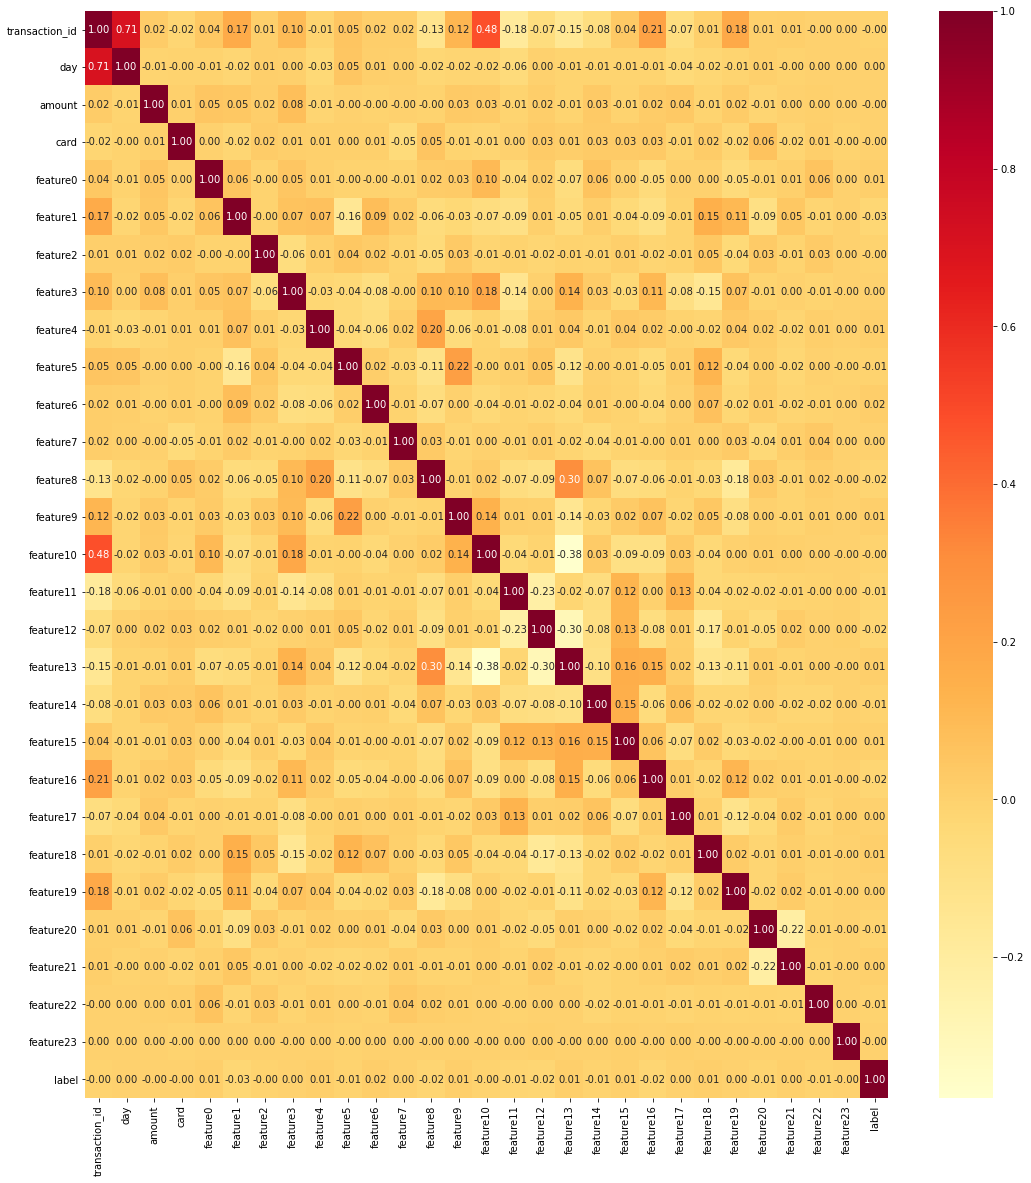

In [50]:
corr = df.corr().index
plt.figure(figsize=(18,20))
sns.heatmap(df[corr].corr(),annot=True,cmap='YlOrRd',fmt='.2f')

In [55]:
x = df[['feature0','feature1','feature4','feature5','feature6','feature8','feature9','feature11','feature12','feature13','feature14','feature15','feature16','feature18','feature20','feature22']]

In [51]:
y = df['label']

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

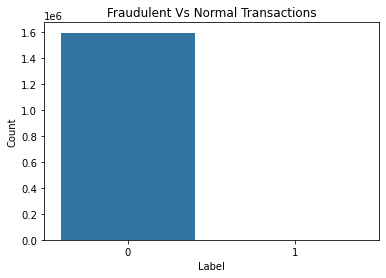

In [62]:
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts(),data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Fraudulent Vs Normal Transactions')
plt.show()

In [68]:
oversamp=RandomOverSampler(1)

C:\ProgramData\Anaconda3\envs\Pytorch\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [69]:
x_train_os,y_train_os=oversamp.fit_sample(x_train,y_train)

In [147]:
log_classify = LogisticRegression(random_state=1,max_iter=1000)

In [74]:
param_dict = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
log_model = GridSearchCV(log_classify, param_dict, cv=5, scoring='accuracy')

In [80]:
scaler = preprocessing.StandardScaler().fit(x_train_os)
X_scaled = scaler.transform(x_train_os)

In [81]:
log_model.fit(X_scaled,y_train_os)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=1),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 50, 100]},
             scoring='accuracy')

In [82]:
y_pred=log_model.predict(x_test)

In [84]:
#check the accuracy of the model
print(accuracy_score(y_test,y_pred))

0.457654886698889


In [85]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[145570 172802]
 [     0    248]]
              precision    recall  f1-score   support

       False       1.00      0.46      0.63    318372
        True       0.00      1.00      0.00       248

    accuracy                           0.46    318620
   macro avg       0.50      0.73      0.32    318620
weighted avg       1.00      0.46      0.63    318620



In [87]:
A = confusion_matrix(y_test,y_pred)

In [100]:
TN = A[0,0]
FP = A[0,1]
FN = A[1,0]
TP = A[1,1]

In [101]:
DR = TP / (TP + FN)
DR

1.0

In [102]:
FPR = FP / TP
FPR

696.7822580645161

In [104]:
df2 = pd.read_csv('datasets/test.csv')

In [106]:
df2

,transaction_id,day,time,amount,card,feature0,feature1,feature2,feature3,feature4,...,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,label
0,1488269,21,00:00:01,35.00,5158124,-434.944428,-323.343970,-110.782931,44.730339,70.248569,...,1.424193,-0.130088,-0.027653,-0.265320,-0.106963,-0.105680,-0.012755,0.009492,-0.000006,False
1,1488270,21,00:00:01,54.50,2718140,-435.145707,-338.357631,321.252613,8.252579,-113.567809,...,-0.350513,0.432199,0.961994,-0.110770,0.012510,-0.093803,-0.004067,-0.001812,-0.000294,False
2,1488271,21,00:00:06,168.97,2043996,-438.449846,-328.748121,187.307614,11.108991,-118.378902,...,0.005328,-0.076905,-0.843179,0.091032,0.018876,0.681332,0.583736,-0.024366,-0.000364,False
3,1488272,21,00:00:44,18.28,939786,-422.874818,-330.531132,-314.515513,-0.125700,112.963625,...,0.544350,-0.759162,0.169211,-0.054523,-0.038898,-0.129540,-0.016737,0.006011,0.000011,False
4,1488273,21,00:00:45,11.05,939786,-422.874818,-330.531132,-314.515513,-0.125700,112.963625,...,0.544350,-0.759162,0.169211,-0.054523,-0.038898,-0.129540,-0.016737,0.006011,0.000011,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803317,2396413,31,22:32:55,1.00,4375940,-383.874981,674.101687,-499.927242,-297.676146,-22.780927,...,0.929000,0.561247,-0.025105,0.022467,0.104120,0.030196,-0.006194,0.001346,-0.000004,False
803318,2396414,31,22:32:59,1.15,4375940,-383.874981,674.101687,-499.927242,-297.676146,-22.780927,...,0.929000,0.561247,-0.025105,0.022467,0.104120,0.030196,-0.006194,0.001346,-0.000004,False
803319,2396415,31,22:42:03,91.65,2955544,-406.697464,658.710412,-142.049574,-276.443908,-17.865570,...,-0.242479,0.551606,0.005911,0.017622,0.091532,0.020637,-0.001663,0.000896,-0.000032,False
803320,2396416,31,22:59:39,91.65,1884954,-434.011077,672.837908,-473.270131,-295.952878,-22.438011,...,0.926201,0.559340,-0.024786,0.022773,0.104380,0.028073,-0.006265,0.001838,-0.000004,False


In [107]:
df2['label'] = df2['label'].astype(int)

In [110]:
x_test = df2[['feature0','feature1','feature4','feature5','feature6','feature8','feature9','feature11','feature12','feature13','feature14','feature15','feature16','feature18','feature20','feature22']]

In [111]:
y_test = df2['label']

In [112]:
y_pred_test=log_model.predict(x_test)

In [113]:
confusion_matrix(y_test,y_pred_test)

array([[352671, 450001],
       [     0,    650]], dtype=int64)

In [114]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61    802672
           1       0.00      1.00      0.00       650

    accuracy                           0.44    803322
   macro avg       0.50      0.72      0.31    803322
weighted avg       1.00      0.44      0.61    803322



In [119]:
x_test.iloc[1]

feature0    -435.145707
feature1    -338.357631
feature4    -113.567809
feature5      -4.473936
feature6      -3.810175
feature8       7.083202
feature9       7.110606
feature11     -0.278422
feature12     -0.841258
feature13      0.067558
feature14      0.811475
feature15     -0.350513
feature16      0.432199
feature18     -0.110770
feature20     -0.093803
feature22     -0.001812
Name: 1, dtype: float64